#                                          MAJOR PROJECT

# CARDIOVASCULAR DISEASE PREDICTION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv(r"C:\Users\jeevi\OneDrive\Documents\cardio_train.csv\cardio_train1.csv")

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
 df.columns.values

array(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype=object)

In [6]:
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [8]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [9]:
df.shape

(70000, 13)

In [10]:
print("number of rows",df.shape[0])
print("number of columns",df.shape[1])

number of rows 70000
number of columns 13


In [11]:
df.isnull()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [13]:
df_dup=df.duplicated().any()
print(df_dup)

False


In [14]:
df.shape

(70000, 13)

In [15]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


<Axes: >

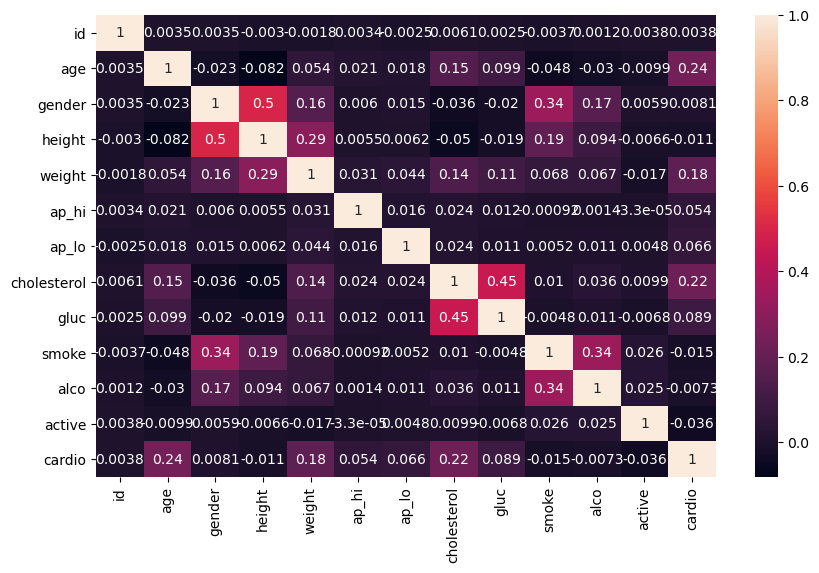

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [18]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [19]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

<Axes: xlabel='cardio', ylabel='count'>

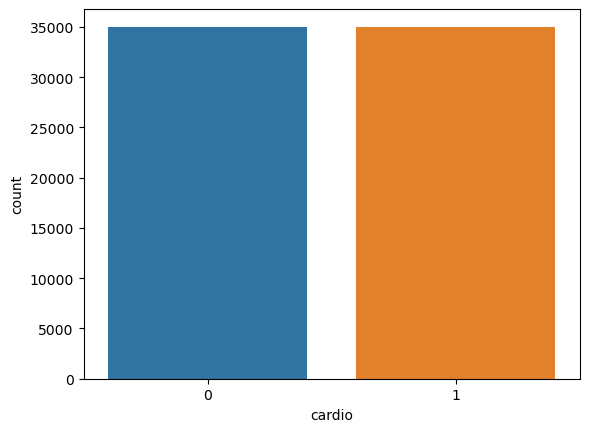

In [20]:
sns.countplot(data=df, x='cardio')


In [21]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

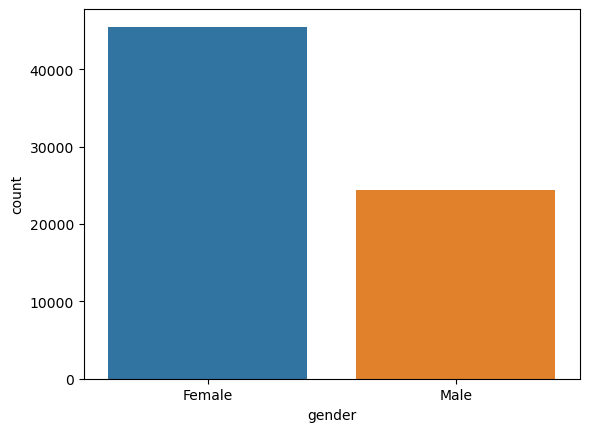

In [22]:
sns.countplot(data=df, x='gender')
plt.xticks([0,1],['Female','Male'])
plt.show()


<Axes: xlabel='gender', ylabel='count'>

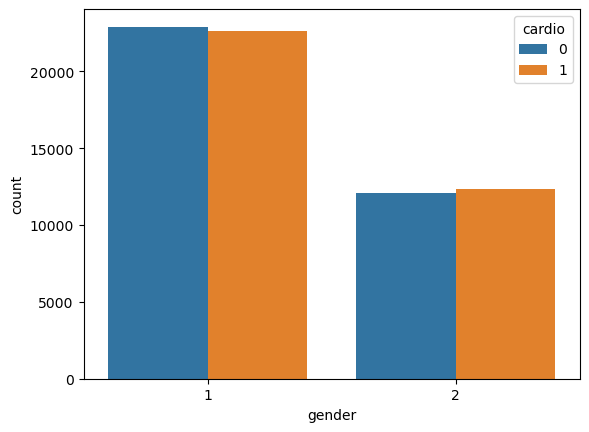

In [23]:
sns.countplot(x ='gender',hue='cardio',data=df)

([<matplotlib.axis.XTick at 0x2f3fcf75c10>,
 [Text(1, 0, 'Male'), Text(0, 0, 'Female')])

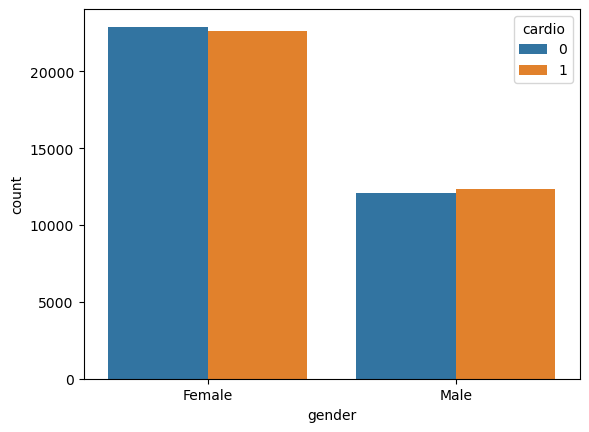

In [24]:
sns.countplot(x ='gender',hue='cardio',data=df)
plt.xticks([1,0],['Male','Female'])

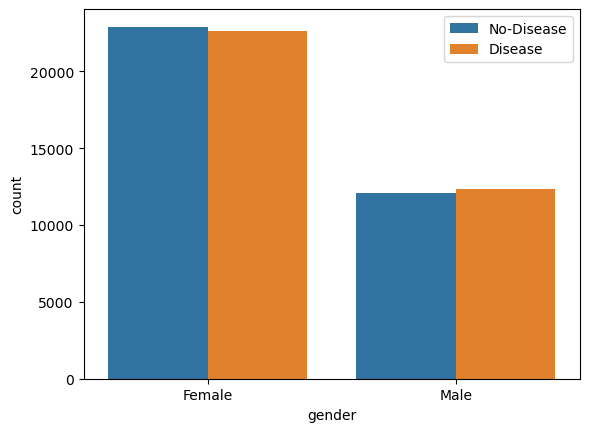

In [25]:
sns.countplot(x ='gender',hue='cardio',data=df)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

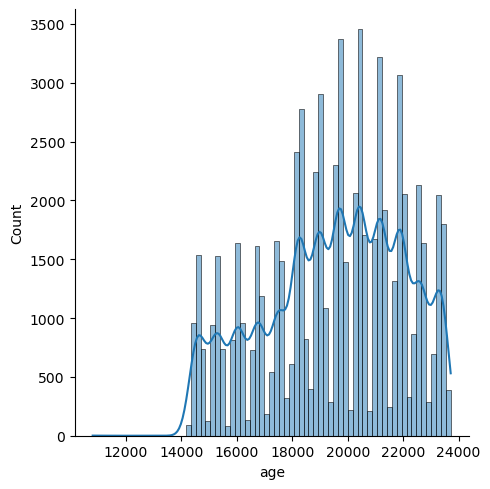

In [26]:
sns.displot(df['age'], kde=True)
plt.show()

<Axes: xlabel='ap_hi', ylabel='count'>

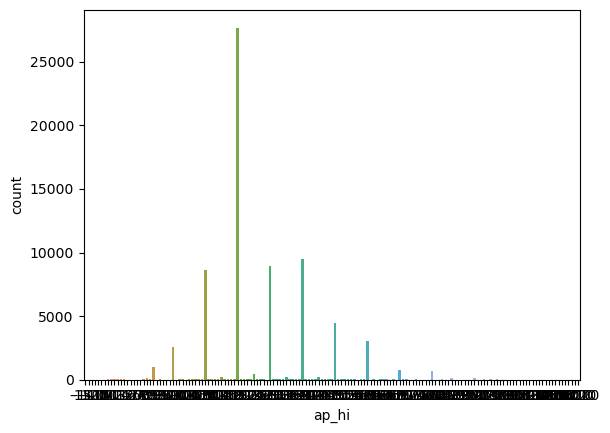

In [27]:
sns.countplot(data=df, x='ap_hi')



<Axes: xlabel='ap_lo', ylabel='count'>

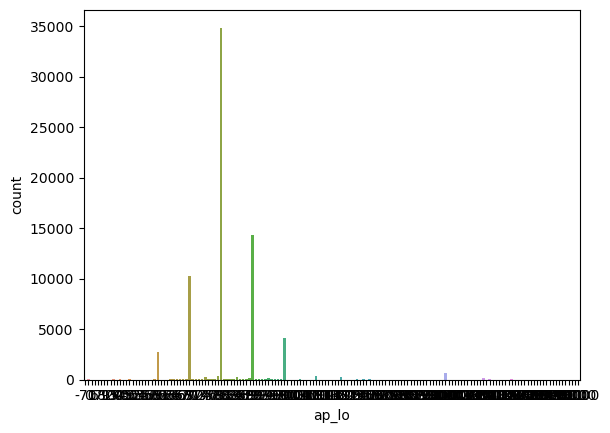

In [28]:
sns.countplot(data=df, x='ap_lo')

<Axes: xlabel='ap_lo', ylabel='count'>

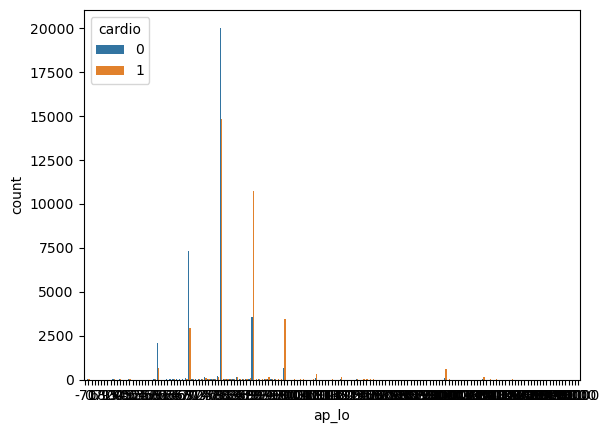

In [29]:
 sns.countplot(data=df, x='ap_lo',hue='cardio')

<Axes: >

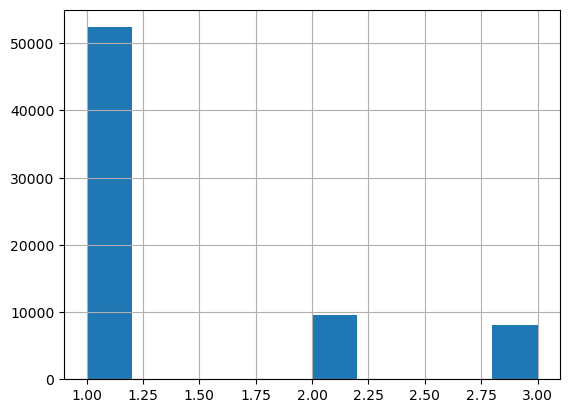

In [30]:
 df['cholesterol'].hist()

In [31]:
df.columns


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [32]:
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [33]:
cate_val

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [34]:
cont_val

['id', 'age', 'height', 'weight', 'ap_hi', 'ap_lo']

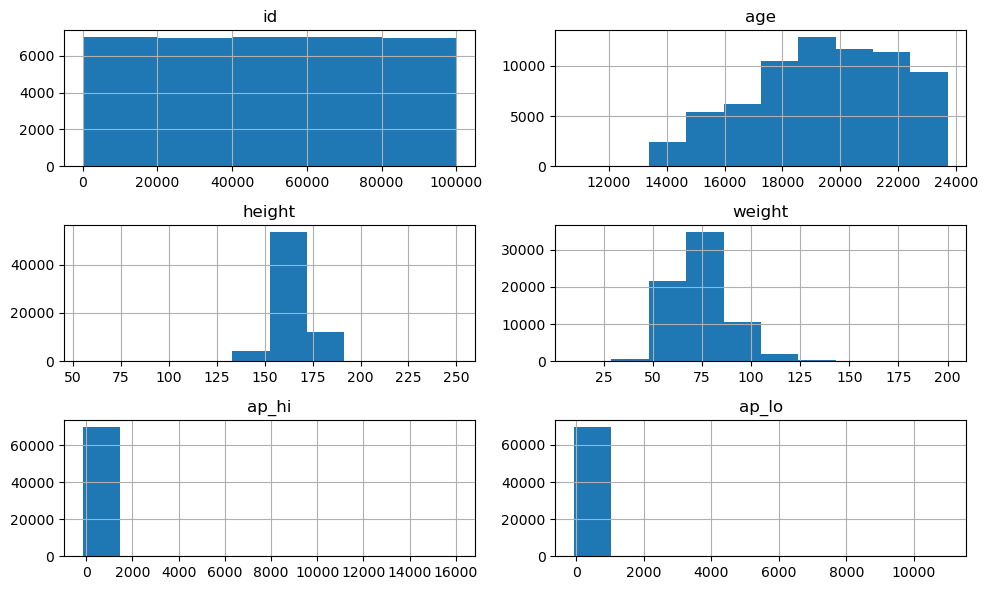

In [35]:
df.hist(cont_val,figsize=(10,6))
plt.tight_layout()
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
st=StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])

In [38]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-1.732080,-0.436062,2,0.443452,-0.847873,-0.122182,-0.088238,1,1,0,0,1,0
1,-1.732046,0.307686,1,-1.018168,0.749831,0.072610,-0.035180,3,1,0,0,1,1
2,-1.732011,-0.247997,1,0.078047,-0.708942,0.007679,-0.141297,3,1,0,0,0,1
3,-1.731976,-0.748152,2,0.565254,0.541435,0.137541,0.017879,1,1,0,0,1,1
4,-1.731942,-0.808543,1,-1.018168,-1.264666,-0.187113,-0.194356,1,1,0,0,0,0


In [39]:
X=df.drop('cardio',axis=1)

In [40]:
y=df['cardio']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [43]:
X_train

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
49989,0.740997,1.312455,2,0.687055,1.097158,-0.057251,-0.088238,1,1,0,0,1
17969,-0.842270,-0.273126,1,0.078047,-0.708942,-0.122182,-0.141297,1,1,0,0,0
2941,-1.588342,-0.527662,1,-0.043755,-0.500546,-0.057251,-0.141297,1,1,0,0,1
37347,0.116653,-0.443357,2,2.757684,1.930743,0.040145,-0.088238,1,1,1,1,1
1182,-1.674890,1.076158,1,0.321650,-0.431081,-0.057251,-0.088238,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.109687,-1.405568,2,0.687055,0.055177,0.137541,-0.088238,1,1,1,0,1
6265,-1.422976,1.515922,2,-0.287358,-0.083754,0.202472,-0.035180,1,1,0,0,1
54886,0.981924,1.669941,1,0.565254,-0.014288,-0.057251,-0.088238,1,1,0,0,1
860,-1.690592,-0.503343,1,0.321650,-0.292150,-0.057251,-0.088238,1,1,0,0,0


In [44]:
X_test

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
46730,0.580761,0.932678,1,-1.018168,-0.708942,0.072610,-0.088238,2,1,0,0,1
48393,0.662907,0.975641,1,0.687055,0.749831,0.202472,-0.035180,1,1,0,0,1
41416,0.319315,1.540646,1,-1.627176,1.097158,0.007679,-0.088238,1,1,0,0,1
34506,-0.023722,0.110299,1,-0.652763,1.583416,-0.057251,-0.088238,1,1,0,0,1
43725,0.433556,-0.435251,1,-0.043755,-0.431081,-0.057251,-0.088238,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1870,-1.640334,-0.544685,2,1.783270,2.208605,0.137541,0.017879,3,3,0,1,1
15961,-0.942093,0.939163,2,0.687055,0.194108,0.007679,-0.035180,2,1,0,0,1
9351,-1.270088,1.187619,1,-0.530961,1.236089,0.007679,-0.035180,1,1,0,0,1
66364,1.551816,-1.425429,1,0.321650,-0.222685,-0.187113,-0.088238,1,1,0,0,1


In [45]:
y_train

49989    0
17969    0
2941     0
37347    1
1182     0
        ..
37194    1
6265     1
54886    0
860      0
15795    0
Name: cardio, Length: 66500, dtype: int64

In [46]:
y_test

46730    1
48393    1
41416    1
34506    1
43725    0
        ..
1870     1
15961    1
9351     0
66364    0
9712     1
Name: cardio, Length: 3500, dtype: int64

# Logistic Regression

In [47]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-1.732080,-0.436062,2,0.443452,-0.847873,-0.122182,-0.088238,1,1,0,0,1,0
1,-1.732046,0.307686,1,-1.018168,0.749831,0.072610,-0.035180,3,1,0,0,1,1
2,-1.732011,-0.247997,1,0.078047,-0.708942,0.007679,-0.141297,3,1,0,0,0,1
3,-1.731976,-0.748152,2,0.565254,0.541435,0.137541,0.017879,1,1,0,0,1,1
4,-1.731942,-0.808543,1,-1.018168,-1.264666,-0.187113,-0.194356,1,1,0,0,0,0


In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [50]:
y_pred1=log.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test,y_pred1)

0.7322857142857143

# svc

In [53]:
from sklearn import svm

In [54]:
svm=svm.SVC()

In [115]:
svm.fit(X_train,y_train)

SVC()

In [56]:
y_pred2=svm.predict(X_test)

In [57]:
accuracy_score(y_test,y_pred2)

0.7465714285714286

# k-Nearest Neighbours classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn=KNeighborsClassifier()

In [60]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [61]:
y_pred3=knn.predict(X_test)

In [126]:
accuracy_score(y_test,y_pred3)

0.6371428571428571

In [127]:
score=[]
for k in range(1,40):
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [128]:
score

[0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571]

In [65]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
score.append(accuracy_score(y_test,y_pred))

In [66]:
score

[0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.6371428571428571,
 0.5911428571428572]

In [67]:
accuracy_score(y_test,y_pred3)

0.6371428571428571

# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt=DecisionTreeClassifier()

In [70]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred4=dt.predict(X_test)

In [72]:
accuracy_score(y_test,y_pred4)

0.6434285714285715

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf=RandomForestClassifier()

In [75]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [76]:
y_pred5=dt.predict(X_test)

In [77]:
accuracy_score(y_test,y_pred5)

0.6434285714285715

In [88]:
import pandas as pd

# Assuming y_pred1, y_pred2, etc., are already defined
from sklearn.metrics import accuracy_score

final_data = pd.DataFrame({'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF'],
                           'ACC': [accuracy_score(y_test, y_pred1),
                                   accuracy_score(y_test, y_pred2),
                                   accuracy_score(y_test, y_pred3),
                                   accuracy_score(y_test, y_pred4),
                                   accuracy_score(y_test, y_pred5)]})


In [89]:
final_data

,Models,ACC
0,LR,0.732286
1,SVM,0.746571
2,KNN,0.637143
3,DT,0.643429
4,RF,0.643429


In [90]:
import seaborn as sns

# Final Result

C:\Users\jeevi\AppData\Roaming\Python\Python311\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Models', ylabel='ACC'>

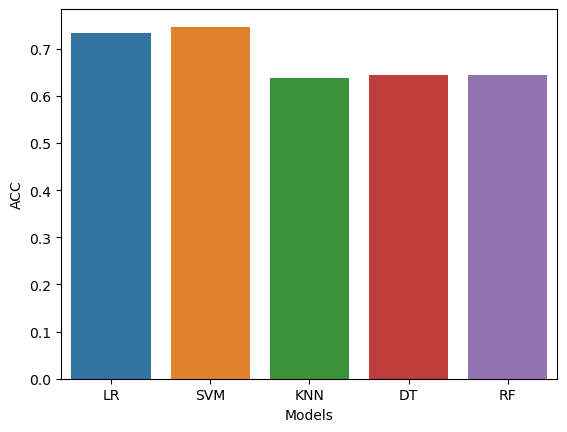

In [91]:
sns.barplot(final_data['Models'],final_data['ACC'])